In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

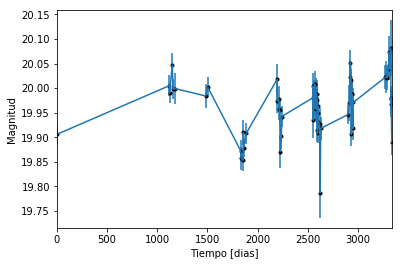

In [2]:
data = np.genfromtxt('LC_20907_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

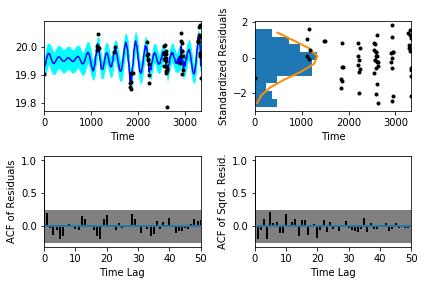

In [5]:
sample.assess_fit()

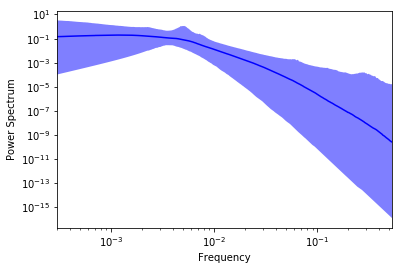

Text(0.000374595,0.056875,'Medida del nivel de ruido')

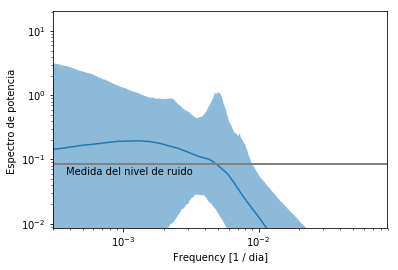

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

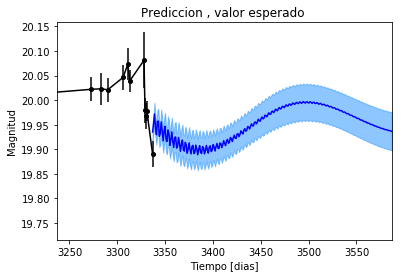

In [7]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

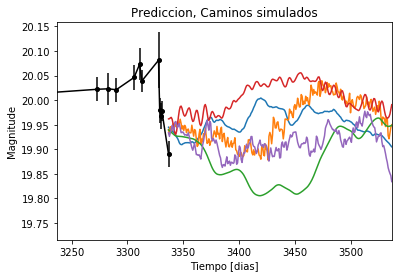

In [8]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


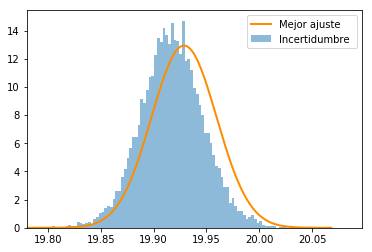

In [9]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

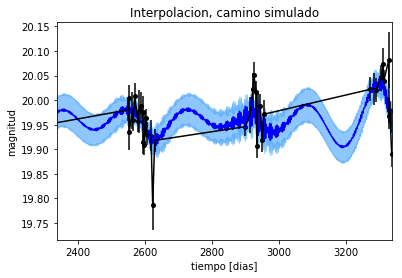

In [10]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

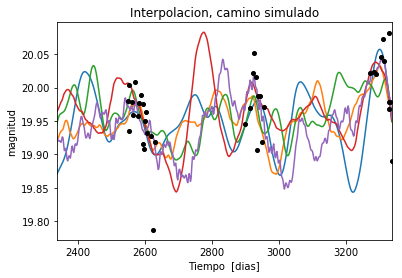

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [12]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [13]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 642.826855392
Median: 0.0132480398862
Standard deviation: 0.193532477276
68% credibility interval: [ 0.0013714   0.14888624]
95% credibility interval: [  4.01280284e-04   8.00846900e-01]
99% credibility interval: [  3.25046197e-04   1.02004204e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 312.051226385
Median: 0.00682540670801
Standard deviation: 0.121750085387
68% credibility interval: [ 0.00099349  0.05602554]
95% credibility interval: [  3.71916928e-04   3.84717608e-01]
99% credibility interval: [  3.14315913e-04   8.99102657e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2673.60899856
Median: 0.0114044848721


In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 696.712000143
Median: 133.632458433
Standard deviation: 1.79005102572
68% credibility interval: [ 131.76722488  135.00438689]
95% credibility interval: [ 129.26992634  136.592189  ]
99% credibility interval: [ 127.25488398  137.29184062]


In [15]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 406.403253074
Median: 0.564330399071
Standard deviation: 2.50600701337
68% credibility interval: [ 0.08005011  3.74009428]
95% credibility interval: [ 0.01992382  8.76539812]
99% credibility interval: [  1.15951200e-02   1.34600351e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 655.060883297
Median: 1.23831337929
Standard deviation: 13.2948117063
68% credibility interval: [  0.0402512   15.78235014]
95% credibility interval: [  2.

In [16]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 4.96201407951e-54
Standard deviation: inf
68% credibility interval: [  4.67842156e-140   5.00238037e+105]
95% credibility interval: [  3.23759604e-218   6.76684616e+149]
99% credibility interval: [  1.20286975e-239   6.78544213e+152]


In [17]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1858.37147171
Median: 19.9537968873
Standard deviation: 0.0197030684636
68% credibility interval: [ 19.93719066  19.97022741]
95% credibility interval: [ 19.91189859  19.99102456]
99% credibility interval: [ 19.88428787  20.01251894]


In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 556.785800573
Median: 0.0769200634226
Standard deviation: 0.286270754296
68% credibility interval: [ 0.          0.56267356]
95% credibility interval: [ 0.          0.97762392]
99% credibility interval: [ 0.          1.04714586]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 556.785800573
Median: 0.0769200634226
Standard deviation: 0.286270754296
68% credibility interval: [ 0.          0.56267356]
95% credibility interval: [ 0.          0.97762392]
99% credibility interval: [ 0.          1.04714586]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 373.022221591
Median: 0.0
Standard deviation: 0.00231422214252
68% cre

In [19]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 696.712000143
Median: 133.632458433
Standard deviation: 1.79005102572
68% credibility interval: [ 131.76722488  135.00438689]
95% credibility interval: [ 129.26992634  136.592189  ]
99% credibility interval: [ 127.25488398  137.29184062]


In [20]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1889.61564826
Median: 0.00273261631964
Standard deviation: 0.00222555182524
68% credibility interval: [ 0.00171983  0.00466486]
95% credibility interval: [ 0.00112485  0.00896237]
99% credibility interval: [ 0.00089774  0.01451027]


In [21]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 925.712596105
Median: 1.24443191012
Standard deviation: 0.210920008757
68% credibility interval: [ 1.04535473  1.46787136]
95% credibility interval: [ 0.87320513  1.71371129]
99% credibility interval: [ 0.79126403  1.87097791]


In [22]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 413.310610023
Median: 0.000166350937652
Standard deviation: 0.243806547727
68% credibility interval: [  1.94093001e-109   1.57174359e-002]
95% credibility interval: [  3.67569226e-153   5.89328814e-001]
99% credibility interval: [  1.93081049e-155   1.82780249e+000]


In [23]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 642.826855392
Median: (-0.0832398895616-1.75912543011j)
Standard deviation: 2.1711634292
68% credibility interval: [-0.93547984-3.4505121j  -0.00861679-0.03556935j]
95% credibility interval: [ -5.03186947e+00-3.67175173j  -2.52131839e-03-0.10318476j]
99% credibility interval: [ -6.40911313e+00+0.j          -2.04232549e-03-0.03795551j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 312.051226385
Median: (-0.0428852951433+1.12739635822j)
Standard deviation: 1.95460622451
68% credibility interval: [-0.35201888+0.37572533j -0.00624228+0.05985394j]
95% credibility interval: [ -2.41725202e+00+5.8858355j  -2.33682298e-03+0.j       ]
99% credibility interval: [ -5.64922860e+00+2.76033484j  -1.97490513e-03+0.j        ]
Posteri